In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [55]:
df = pd.read_csv('Dummy Data HSS.csv')

In [3]:
df.shape

(4572, 5)

In [4]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,4562.0,54.066857,26.125054,10.000000,32.000000,53.000000,77.000000,100.000000
Radio,4568.0,18.160356,9.676958,0.000684,10.525957,17.859513,25.649730,48.871161
Social Media,4566.0,3.323956,2.212670,0.000031,1.527849,3.055565,4.807558,13.981662
Sales,4566.0,192.466602,93.133092,31.199409,112.322882,189.231172,272.507922,364.079751


In [6]:
df['TV'].isnull().sum()

10

In [57]:
num_cols = df[['TV', 'Radio', 'Social Media', 'Sales']]

num_cols

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866
4568,71.0,20.610685,6.545573,249.101915
4569,44.0,19.800072,5.096192,163.631457
4570,71.0,17.534640,1.940873,253.610411


In [58]:
for i in num_cols.columns:
    df[i].fillna(df[i].mean(), inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   float64
 1   Radio         4572 non-null   float64
 2   Social Media  4572 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4572 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [60]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [61]:
df = pd.get_dummies(df, columns=['Influencer'])

In [62]:
df.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0


<AxesSubplot:xlabel='TV', ylabel='Sales'>

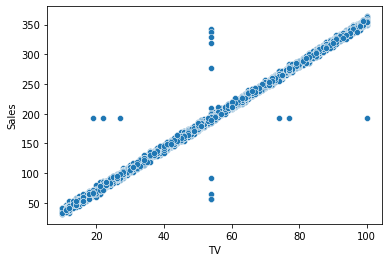

In [12]:
sns.scatterplot(x='TV', y='Sales', data=df)

A very strong linear relationship between TV spend and sales. Some outliers that we'll need to get rid of.

<AxesSubplot:xlabel='TV'>

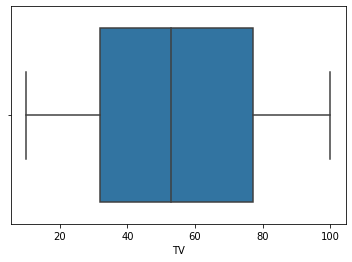

In [50]:
sns.boxplot(x=df['TV'])

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

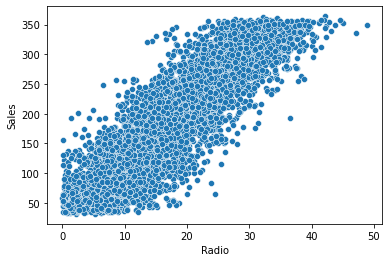

In [75]:
sns.scatterplot(x='Radio', y='Sales', data=df)

Another strong relationship between radio spend and sales.

<AxesSubplot:xlabel='Social Media', ylabel='Sales'>

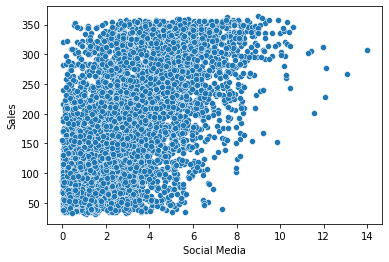

In [76]:
sns.scatterplot(x='Social Media', y='Sales', data=df)

Much harder to tell with the social media data but it looks like there could be a relationship. Maybe worth a test to see and decide whether it's worth keeping in the model or not.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.model_selection import train_test_split

In [63]:
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']]

y = df['Sales']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [65]:
model = LinearRegression().fit(X_train, y_train)

In [66]:
model.score(X_train, y_train)

0.994179937966478

A really good coefficient of determination. Very close to 1 which I imagine is due to this being made up data to work with on linear regression practice.

In [35]:
model.coef_

array([ 3.51087377,  0.14403485,  0.05547979, -0.30962588,  0.06536278,
        0.05951516,  0.18474794])

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
y_pred = model.predict(X_test)

In [38]:
y_pred

array([264.01565803,  59.92755094,  96.20145304, ..., 127.66103141,
       334.38187142, 222.96949207])

In [39]:
mean_squared_error(y_test, y_pred)

79.39064204029462

In [69]:
np.std(y_pred)

93.616961778872

I'm not sure what to make of this mean squared error since apparently there is not correct answer outside of 0 is ideal. Maybe with how large some of the TV spend numbers are this isn't too bad?

In [40]:
r2_score(y_test, y_pred)

0.9909230518306251

Really good score on the prediction set. Very close to what we achieved on the training set which is promising.

In [41]:
X_test = np.array(X_test)

In [42]:
X_test

array([[74.        , 27.96329539,  2.83758496, ...,  0.        ,
         0.        ,  1.        ],
       [17.        ,  1.43754627,  0.17589387, ...,  0.        ,
         0.        ,  1.        ],
       [27.        ,  9.5698248 ,  2.21660193, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [36.        ,  9.09915863,  1.05139246, ...,  0.        ,
         1.        ,  0.        ],
       [94.        , 29.84551294,  2.78384096, ...,  1.        ,
         0.        ,  0.        ],
       [63.        , 15.49398588,  0.38325758, ...,  0.        ,
         0.        ,  0.        ]])

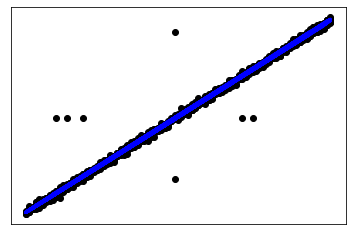

In [43]:
plt.scatter(X_test[:,0], y_test, color="black")
plt.plot(X_test[:,0], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

This data looks almost exactly like the TV scatter plot from earlier. More digging is needed to confirm but this may validate the overfitting when looking at the outliers and comparing to the earlier scatter plot.

I wonder what running the model with only radio, social media and the influencer dummy variables would show. Worth a test.